In [ ]:
!pip install mne

In [ ]:
pip install pyEDFlib


In [ ]:
pip install --upgrade tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import mne
from glob import glob
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

In [ ]:
# Load EDF files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace the file path below with the correct path to your EDF files
all_file_path = glob('/content/drive/MyDrive/TDAH/*')
print(len(all_file_path))


121


In [ ]:

healthy_file_path = [i for i in all_file_path if 'h' in i.split('/')[-1]]
patient_file_path = [i for i in all_file_path if 's' in i.split('/')[-1]]
print(len(healthy_file_path), len(patient_file_path))



60 61


In [ ]:
import pyedflib

# Ouvrir le fichier EDF
f = pyedflib.EdfReader("/content/drive/MyDrive/TDAH/s13.edf")

# Obtenir la fréquence d'échantillonnage
freq = f.getSampleFrequency(0)

# Afficher la fréquence d'échantillonnage
print("La fréquence d'échantillonnage est : " + str(freq) + " Hz")

# Fermer le fichier EDF
f.close()


La fréquence d'échantillonnage est : 128.0 Hz


In [ ]:

# Define function to read and preprocess data
def read_data(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=61)
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    array = epochs.get_data()
    return array


In [ ]:
# Load and preprocess data
control_epochs_array = [read_data(i) for i in healthy_file_path]
patient_epochs_array = [read_data(i) for i in patient_file_path]

# Concatenate control and patient epoch arrays separately
control_epochs_array = np.concatenate(control_epochs_array, axis=0)
patient_epochs_array = np.concatenate(patient_epochs_array, axis=0)

# Create labels for control and patient groups
control_epochs_labels = np.zeros(len(control_epochs_array))
patient_epochs_labels = np.ones(len(patient_epochs_array))

# Combine control and patient data and labels
epochs_array = np.concatenate((control_epochs_array, patient_epochs_array), axis=0)
epochs_labels = np.concatenate((control_epochs_labels, patient_epochs_labels), axis=0)

# Create group list
group_list = []
for i, j in enumerate(healthy_file_path):
    group_list.extend([i] * len(read_data(j)))
for i, j in enumerate(patient_file_path, start=len(healthy_file_path)):
    group_list.extend([i] * len(read_data(j)))
group_array = np.array(group_list)


Extracting EDF parameters from /content/drive/MyDrive/TDAH/h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8063  =      0.000 ...    62.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13951  =      0.000 ...   108.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Ex

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h15.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading 0 ... 14207  =      0.000 ...   110.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h17.edf.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16255  =      0.000 ...   126.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19199  =      0.000 ...   149.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19327  =      0.000 ...   150.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13055  =      0.000 ...   101.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16767  =      0.000 ...   130.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15359  =      0.000 ...   119.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19071  =      0.000 ...   148.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   154.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 845 samples (6.602 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15615  =      0.000 ...   121.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15999  =      0.000 ...   124.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13311  =      0.000 ...   103.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h32.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12159  =      0.000 ...    94.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14591  =      0.000 ...   113.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h30.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h36.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16383  =      0.000 ...   127.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11263  =      0.000 ...    87.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14847  =      0.000 ...   115.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11519  =      0.000 ...    89.992 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h39.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15103  =      0.000 ...   117.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13439  =      0.000 ...   104.992 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12543  =      0.000 ...    97.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h45.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h44.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h43.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h46.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h48.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Reading 0 ... 13823  =      0.000 ...   107.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h5.edf..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20991  =      0.000 ...   163.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h49.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13439  =      0.000 ...   104.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17919  =      0.000 ...   139.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 22271  =      0.000 ...   173.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h53.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h51.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h56.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h6.edf...
EDF file detected
Setting channel info structure...
Cr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 22399  =      0.000 ...   174.992 secs...
EEG channel type selected for re-referencing
Applying average reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17151  =      0.000 ...   133

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h57.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 44 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h7.edf...
EDF file detected
Setting channel info structure...
Cr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10495  =      0.000 ...    81.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17919  =      0.000 ...   139.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16895  =      0.000 ...   131.992 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35327  =      0.000 ...   275.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
68 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 68 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s16.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 56 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s17.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 33663  =      0.000 ...   262.992 secs...
EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 65 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9983  =      0.000 ...    77.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12159  =      0.000 ...    94.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s14.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11775  =      0.000 ...    91.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Filter length: 845 samples (6.602 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23167  =      0.000 ...   180.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s26.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Filter length: 845 samples (6.602 s)

Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29311  =      0.000 ...   228.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 57 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s21.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15359  =      0.000 ...   119.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 21759  =      0.000 ...   169.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 42 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17407  =      0.000 ...   135.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19583  =      0.000 ...   152.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s28.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s33.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20223  =      0.000 ...   157.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s27.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s3.edf...
EDF file detected
Setting channel info structure...
Cr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s31.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s35.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18687  =      0.000 ...   145.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s41.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 59 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s30.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s36.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s42.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s37.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20479  =      0.000 ...   159.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20223  =      0.000 ...   157.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9855  =      0.000 ...    76.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13567  =      0.000 ...   105.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s43.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   154.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 28159  =      0.000 ...   219.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 54 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14335  =      0.000 ...   111.992 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10495  =      0.000 ...    81.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13951  =      0.000 ...   108.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s44.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 27263  =      0.000 ...   212.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s51.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s55.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18687  =      0.000 ...   145.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s57.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11519  =      0.000 ...    89.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15487  =      0.000 ...   120.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17663  =      0.000 ...   137.992 secs...
EEG channel type selected 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 46 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s58.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20223  =      0.000 ...   157.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s47.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 66 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s7.edf...
EDF file detected
Setting channel info structure...
Cr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s9.edf...
EDF file detected
Setting channel info structure...
Cr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 39039  =      0.000 ...   304.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s8.edf...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 43263  =      0.000 ...   337.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 84 events and 640 original time points ...
0 bad

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /content/drive/MyDrive/TDAH/h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8063  =      0.000 ...    62.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h12.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h18.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h15.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14207  =      0.000 ...   110.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14719  =      0.000 ...   114.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16255  =      0.000 ...   126.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19199  =      0.000 ...   149.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19327  =      0.000 ...   150.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13055  =      0.000 ...   101.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window w

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16767  =      0.000 ...   130.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16127  =      0.000 ...   125.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15359  =      0.000 ...   119.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h22.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   154.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15615  =      0.000 ...   121.992 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15999  =      0.000 ...   124.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13311  =      0.000 ...   103.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12031  =      0.000 ...    93.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12159  =      0.000 ...    94.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14591  =      0.000 ...   113.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19327  =      0.000 ...   150.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15487  =      0.000 ...   120.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16383  =      0.000 ...   127.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11263  =      0.000 ...    87.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14847  =      0.000 ...   115.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11519  =      0.000 ...    89.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
EEG channel type selected for re-referencing
Applying average reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16767  =      0.000 ...   130

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15103  =      0.000 ...   117.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13439  =      0.000 ...   104.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12543  =      0.000 ...    97.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 14335  =      0.000 ...   111.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 845 samples (6.602 s)

Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h44.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15615  =      0.000 ...   121.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17279  =      0.000 ...   134.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17151  =      0.000 ...   133.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13823  =      0.000 ...   107.992 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10879  =      0.000 ...    84.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20991  =      0.000 ...   163.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17791  =      0.000 ...   138.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13439  =      0.000 ...   104.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17919  =      0.000 ...   139.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 22271  =      0.000 ...   173.992 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19327  =      0.000 ...   150.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h51.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 22399  =      0.000 ...   174.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17151  =      0.000 ...   133.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h57.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 44 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10879  =      0.000 ...    84.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10495  =      0.000 ...    81.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17919  =      0.000 ...   139.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/h9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16895  =      0.000 ...   131.992 secs...
EEG channel type selected 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35327  =      0.000 ...   275.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
68 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 68 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s16.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 56 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 27647  =      0.000 ...   215.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 33663  =      0.000 ...   262.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 65 events and 640 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12287  =      0.000 ...    95.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items ac

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12159  =      0.000 ...    94.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16639  =      0.000 ...   129.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16511  =      0.000 ...   128.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11775  =      0.000 ...    91.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23167  =      0.000 ...   180.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9343  =      0.000 ...    72.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29311  =      0.000 ...   228.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 57 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18175  =      0.000 ...   141.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15359  =      0.000 ...   119.992 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s19.edf...
EDF file detected
Setting channel info structure...
C

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Filter length: 845 samples (6.602 s)

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 42 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17407  =      0.000 ...   135.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19583  =      0.000 ...   152.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10751  =      0.000 ...    83.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20223  =      0.000 ...   157.992 secs...
EEG channel type selected

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17663  =      0.000 ...   137.992 secs...
EEG channel type selected 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16767  =      0.000 ...   130.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 640 original time points ...
0 bad

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18687  =      0.000 ...   145.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30335  =      0.000 ...   236.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13439  =      0.000 ...   104.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12799  =      0.000 ...    99.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20479  =      0.000 ...   159.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9855  =      0.000 ...    76.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 21375  =      0.000 ...   166.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
41 matching events found
No baseline correction applied
0 projection items a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 28159  =      0.000 ...   219.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10495  =      0.000 ...    81.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 640 original time points ...
0 bad epochs dropped
Ex

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 27263  =      0.000 ...   212.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 640 original time points ...
0 bad epochs dropped
Ex

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18431  =      0.000 ...   143.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17407  =      0.000 ...   135.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15487  =      0.000 ...   120.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 640 original time points ...
0 bad epochs dropped
Ex

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 845 samples (6.602 s)

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 46 events and 640 original time points ...
0 bad epochs dropped
Ex

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20223  =      0.000 ...   157.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 66 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17663  =      0.000 ...   137.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 640 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/TDAH/s50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 39039  =      0.000 ...   304.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 61.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 62.50 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 84 events and 640 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [ ]:
# Define feature extraction functions
def mean(x):
    return np.mean(x, axis=-1)
def std(x):
    return np.std(x, axis=-1)
def ptp(x):
    return np.ptp(x, axis=-1)
def var(x):
    return np.min(x, axis=-1)
def minim(x):
    return np.min(x, axis=-1)
def maxim(x):
    return np.max(x, axis=-1)
def argminim(x):
    return np.argmin(x, axis=-1)
def argmaxim(x):
    return np.argmax(x, axis=-1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis=-1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis=-1)), axis=-1)
def skewness(x):
    return stats.skew(x, axis=-1)
def kurtosis(x):
    return stats.kurtosis(x, axis=-1)
def concatenate_features(x):
    return np.concatenate((mean(x), std(x), ptp(x), var(x), minim(x), maxim(x), argminim(x), argmaxim(x),rms(x), abs_diff_signal(x), skewness(x), kurtosis(x)), axis=-1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense

def cnnmodel():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(640,19), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Dropout(0.5))
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.5))



    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = cnnmodel()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 640, 64)             │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 640, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 640, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 320, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 320, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 320, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 160, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 160, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 160, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 160, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,737 (112.25 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
print("epochs_array shape:", epochs_array.shape)
print("epochs_labels shape:", epochs_labels.shape)
print("group_array shape:", group_array.shape)

epochs_array shape: (4172, 19, 640)
epochs_labels shape: (4172,)
group_array shape: (4172,)


In [ ]:
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GroupKFold
import numpy as np

def participant_level_predictions(epochs_array, group_array, predictions):
    participant_predictions = []
    for participant_index in np.unique(group_array):
        participant_epochs = epochs_array[group_array == participant_index]
        participant_pred = predictions[group_array == participant_index]
        avg_prediction = np.mean(participant_pred)
        participant_predictions.append(round(avg_prediction))
    return np.array(participant_predictions)

gkf = GroupKFold(n_splits=5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
accuracies = []  # Changed accuracy to accuracies
confusion_matrices = []

for train_index, val_index in gkf.split(epochs_array, epochs_labels, groups=group_array):
    train_features, train_labels = epochs_array[train_index], epochs_labels[train_index]
    val_features, val_labels = epochs_array[val_index], epochs_labels[val_index]

    scaler = StandardScaler()
    train_features = np.transpose(train_features, (0,2,1))
    val_features = np.transpose(val_features, (0,2,1))

    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    model = cnnmodel()

    history = model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_data=(val_features, val_labels), callbacks=[early_stopping])

    # Append accuracy of the current fold
    accuracies.append(model.evaluate(val_features, val_labels)[1])

    # Get the predicted probabilities for the validation set
    val_predictions = model.predict(val_features)

    # Predicted classes (0 or 1) instead of probabilities
    predicted_classes = np.round(val_predictions).astype(int).flatten()

    # Get participant-level predictions
    val_participant_predictions = participant_level_predictions(val_features, group_array[val_index], predicted_classes)
    val_participant_labels = participant_level_predictions(val_features, group_array[val_index], val_labels)

    # Compute the confusion matrix for this fold
    conf_matrix = confusion_matrix(val_participant_labels, val_participant_predictions)
    confusion_matrices.append(conf_matrix)

# Calculate the mean accuracy over all folds
mean_accuracy = np.mean(accuracies)

print("Mean Accuracy:", mean_accuracy)
print("Confusion Matrix of the last fold:")
print(confusion_matrices[-1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.6404 - loss: 0.6562 - val_accuracy: 0.6791 - val_loss: 0.5651
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9207 - loss: 0.2019 - val_accuracy: 0.7512 - val_loss: 0.6011
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9846 - loss: 0.0631 - val_accuracy: 0.8149 - val_loss: 0.9197
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9837 - loss: 0.0414 - val_accuracy: 0.7921 - val_loss: 0.9488
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.9980 - loss: 0.0097 - val_accuracy: 0.7620 - val_loss: 0.9186
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.9993 - loss: 0.0077 - val_accuracy: 0.8101 - val_loss: 1.1067
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9980 - loss: 0.0141 - val_accuracy: 0.7969 - val_loss: 1.2933
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9975 - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.7611 - loss: 0.5003 - val_accuracy: 0.7707 - val_loss: 0.5117
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9394 - loss: 0.1454 - val_accuracy: 0.7967 - val_loss: 0.7872
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9860 - loss: 0.0484 - val_accuracy: 0.7884 - val_loss: 0.8492
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.8452 - val_loss: 1.0707
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9923 - loss: 0.0270 - val_accuracy: 0.8511 - val_loss: 0.9869
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.9984 - loss: 0.0079 - val_accuracy: 0.8357 - val_loss: 1.0640
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.8191 - val_loss: 1.2638
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9982 - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.6510 - loss: 0.6253 - val_accuracy: 0.9075 - val_loss: 0.2853
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9505 - loss: 0.1409 - val_accuracy: 0.7981 - val_loss: 0.6523
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9834 - loss: 0.0493 - val_accuracy: 0.8053 - val_loss: 0.8581
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9848 - loss: 0.0517 - val_accuracy: 0.8053 - val_loss: 0.8306
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9936 - loss: 0.0318 - val_accuracy: 0.8365 - val_loss: 0.7380
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.9970 - loss: 0.0132 - val_accuracy: 0.8053 - val_loss: 0.9820
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9949 - loss: 0.0142 - val_accuracy: 0.8666 - val_loss: 0.7382
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9924 - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.7200 - loss: 0.5275 - val_accuracy: 0.8496 - val_loss: 0.5023
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9433 - loss: 0.1380 - val_accuracy: 0.8387 - val_loss: 0.6347
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.9899 - loss: 0.0564 - val_accuracy: 0.8424 - val_loss: 1.0989
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9791 - loss: 0.0591 - val_accuracy: 0.8255 - val_loss: 0.8834
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.9890 - loss: 0.0397 - val_accuracy: 0.8002 - val_loss: 1.1056
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.9968 - loss: 0.0170 - val_accuracy: 0.7954 - val_loss: 1.3345
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.9969 - loss: 0.0118 - val_accuracy: 0.7906 - val_loss: 2.6034
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9978 - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.6914 - loss: 0.5444 - val_accuracy: 0.7942 - val_loss: 0.4734
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9568 - loss: 0.1342 - val_accuracy: 0.8363 - val_loss: 0.5133
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.9791 - loss: 0.0635 - val_accuracy: 0.8279 - val_loss: 0.8150
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.9959 - loss: 0.0191 - val_accuracy: 0.8339 - val_loss: 0.9407
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9945 - loss: 0.0243 - val_accuracy: 0.8339 - val_loss: 0.9025
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.9997 - loss: 0.0075 - val_accuracy: 0.8339 - val_loss: 1.0543
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 0.8327 - val_loss: 1.5141
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9974 - loss: 0.007

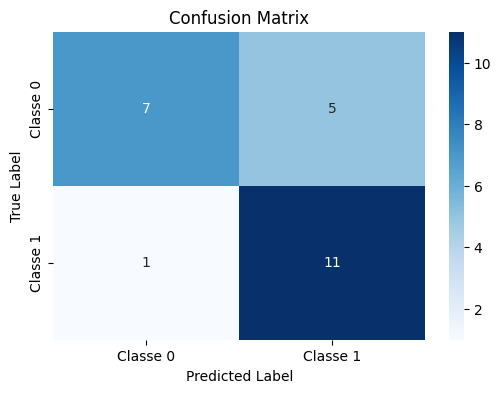

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Tracer la matrice de confusion en utilisant seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrices[0], annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title ('Confusion Matrix')
plt.show()

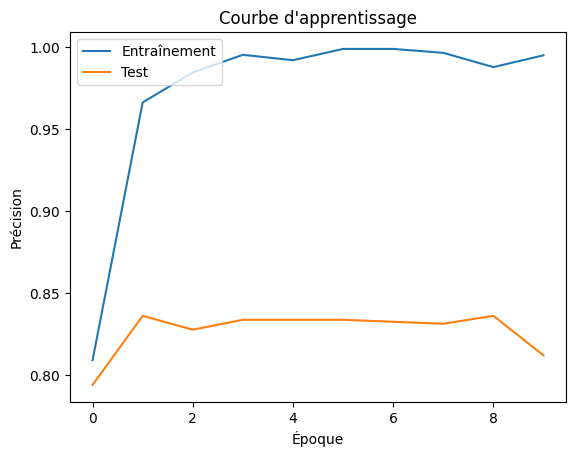

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


# Tracer les courbes d'apprentissage
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Courbe d\'apprentissage')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Test'], loc='upper left')
plt.show()
